# Prepared for Data

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Instal library Kaggle
!pip install kaggle

# Unduh dataset dari Kaggle
!kaggle datasets download -d tanshihjen/early-stage-diabetes-risk-prediction

# Ekstrak file zip yang diunduh
!unzip early-stage-diabetes-risk-prediction.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/tanshihjen/early-stage-diabetes-risk-prediction
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/2.54k [00:00<?, ?B/s]
100% 2.54k/2.54k [00:00<00:00, 6.33MB/s]
Archive:  early-stage-diabetes-risk-prediction.zip
  inflating: diabetes_risk_prediction_dataset.csv  


# Predictive Modeling for Diabetes Risk Assessment: Exploring Feature Associations and Evaluating Classification Algorithms

# Data Loading & Understanding

In [2]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('diabetes_risk_prediction_dataset.csv')

print('Dimension of the dataset: ', data.shape)

print('Attributes in the dataset: ', data.columns.values)
data.head()

Dimension of the dataset:  (520, 17)
Attributes in the dataset:  ['Age' 'Gender' 'Polyuria' 'Polydipsia' 'sudden weight loss' 'weakness'
 'Polyphagia' 'Genital thrush' 'visual blurring' 'Itching' 'Irritability'
 'delayed healing' 'partial paresis' 'muscle stiffness' 'Alopecia'
 'Obesity' 'class']


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


#### Attributes Description:

- Age (1-20 to 65): Age range of the individuals.
- Sex (1. Male, 2. Female): Gender information.
- Polyuria (1. Yes, 2. No): Presence of excessive urination.
- Polydipsia (1. Yes, 2. No): Excessive thirst.
- sudden weight loss (1. Yes, 2. No): Abrupt weight loss.
- weakness (1. Yes, 2. No): Generalized weakness.
- Polyphagia (1. Yes, 2. No): Excessive hunger.
- Genital Thrush (1. Yes, 2. No): Presence of genital thrush.
- visual blurring (1. Yes, 2. No): Blurring of vision.
- Itching (1. Yes, 2. No): Presence of itching.
- Irritability (1. Yes, 2. No): Display of irritability.
- delayed healing (1. Yes, 2. No): Delayed wound healing.
- partial paresis (1. Yes, 2. No): Partial loss of voluntary movement.
- muscle stiffness (1. Yes, 2. No): Presence of muscle stiffness.
- Alopecia (1. Yes, 2. No): Hair loss.
- Obesity (1. Yes, 2. No): Presence of obesity.
- class (1. Positive, 2. Negative): Diabetes classification.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

# Exploratory Data Analysis (EDA)

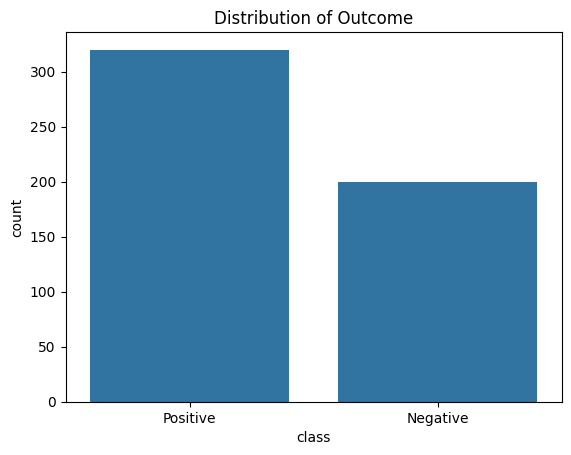

In [9]:
# Distribusi variabel target
sns.countplot(x='class', data=data)
plt.title('Distribution of Outcome')
plt.show()

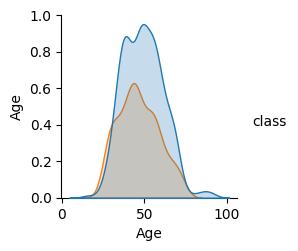

In [10]:
# Pairplot untuk hubungan pasangan variabel
sns.pairplot(data, hue='class', diag_kind='kde')
plt.show()

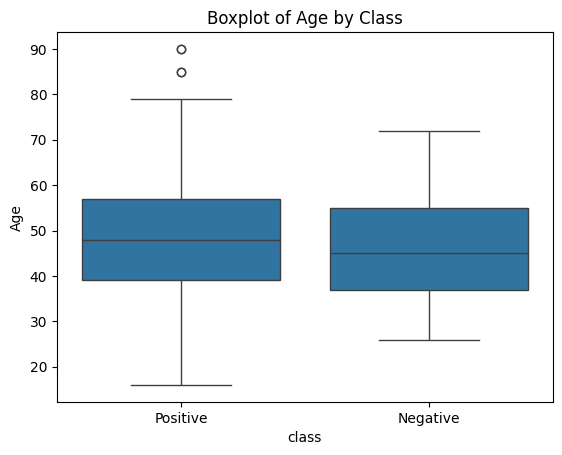

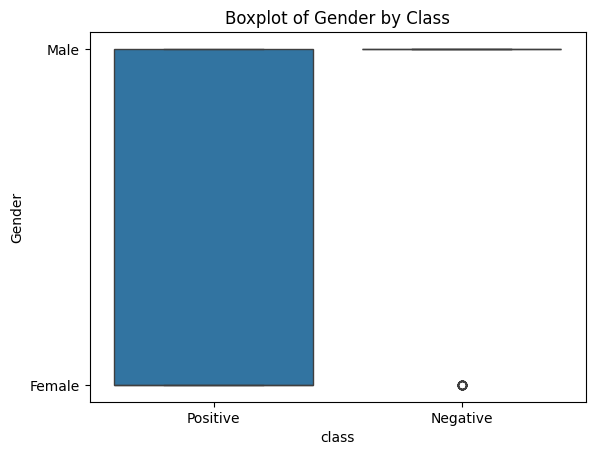

In [14]:
# Box plot untuk analisis fitur
sns.boxplot(x='class', y='Age', data=data)
plt.title('Boxplot of Age by Class')
plt.show()

sns.boxplot(x='class', y='Gender', data=data)
plt.title('Boxplot of Gender by Class')
plt.show()

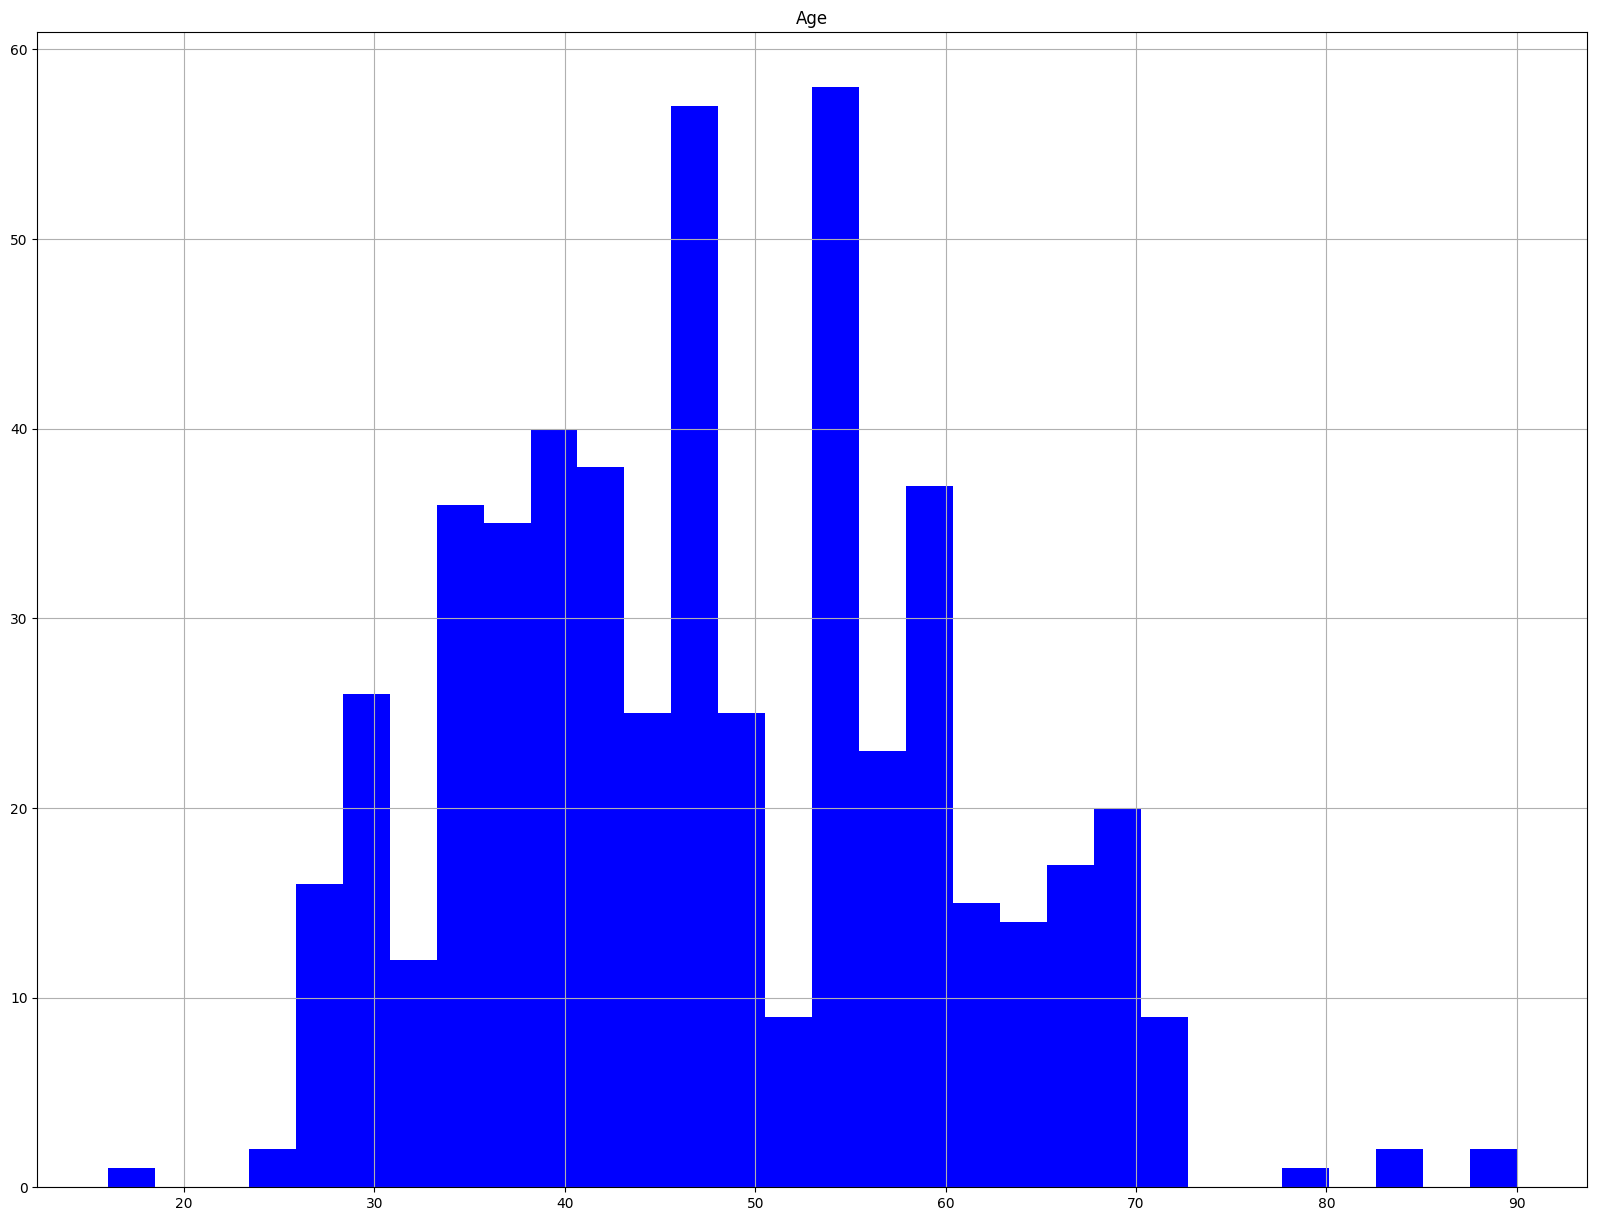

In [15]:
# Histogram untuk distribusi fitur
data.hist(bins=30, figsize=(20, 15), color='blue')
plt.show()

<ipython-input-16-56fc3d9bd3df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Set2')


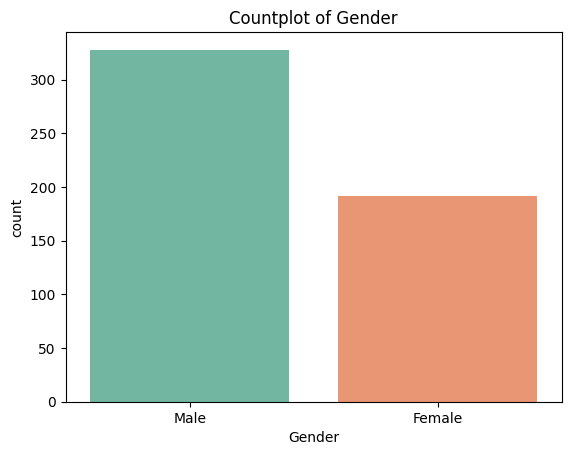

<ipython-input-16-56fc3d9bd3df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Polyuria', data=data, palette='Set2')


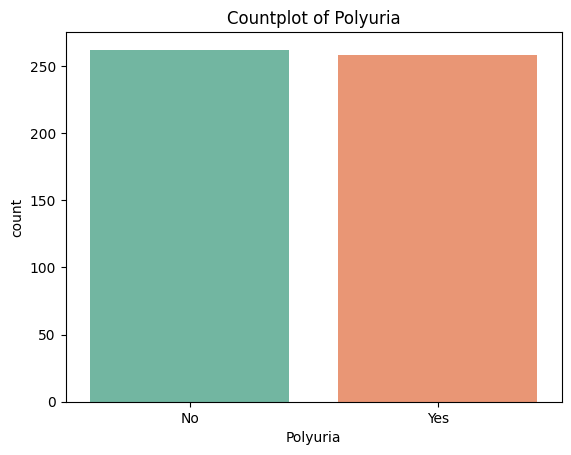

In [16]:
# Count plot untuk fitur kategorikal
sns.countplot(x='Gender', data=data, palette='Set2')
plt.title('Countplot of Gender')
plt.show()

sns.countplot(x='Polyuria', data=data, palette='Set2')
plt.title('Countplot of Polyuria')
plt.show()

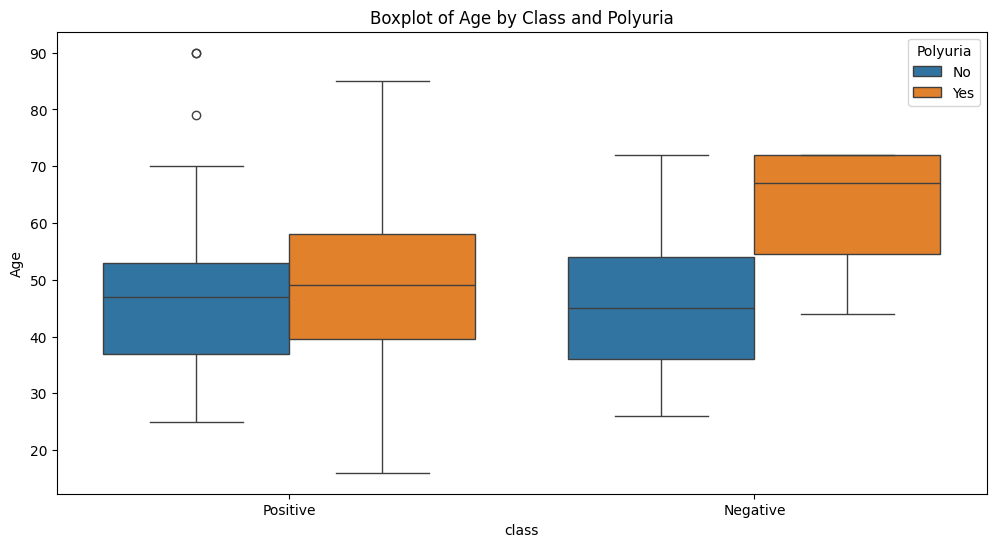

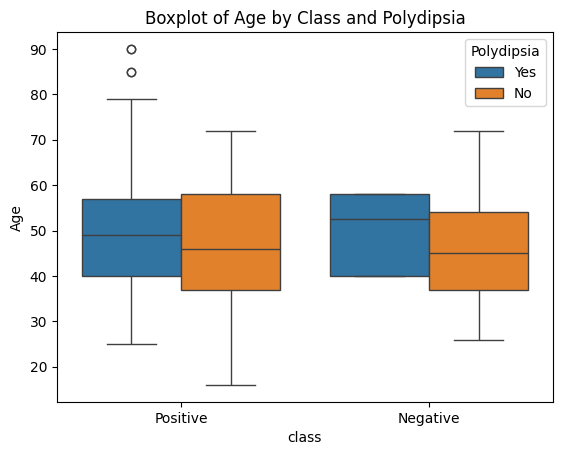

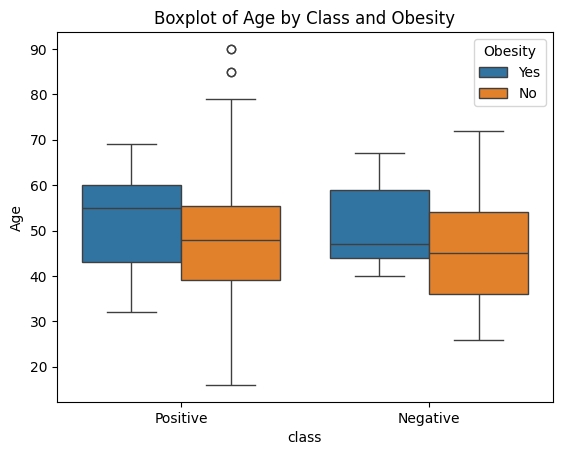

In [17]:
# Box plot untuk analisis fitur
plt.figure(figsize=(12, 6))

# Polyuria
sns.boxplot(x='class', y='Age', hue='Polyuria', data=data)
plt.title('Boxplot of Age by Class and Polyuria')
plt.show()

# Polydipsia
sns.boxplot(x='class', y='Age', hue='Polydipsia', data=data)
plt.title('Boxplot of Age by Class and Polydipsia')
plt.show()

# Obesity
sns.boxplot(x='class', y='Age', hue='Obesity', data=data)
plt.title('Boxplot of Age by Class and Obesity')
plt.show()

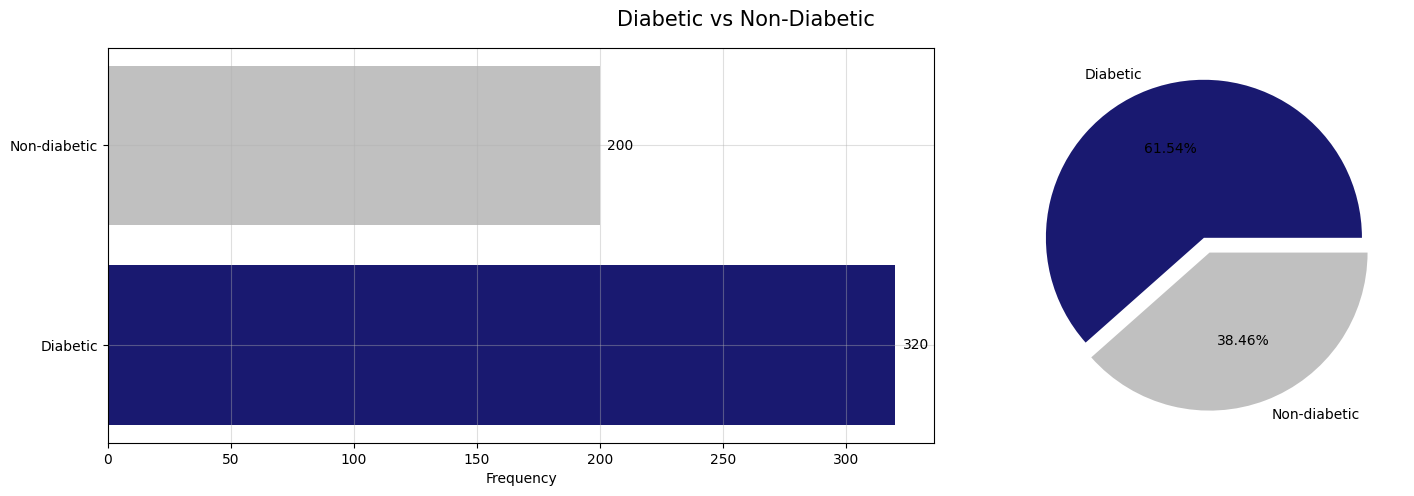

In [19]:
# distribution of diabetic and non-diabetic samples
samples = data['class'].value_counts()
colors = ['midnightblue','silver']

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=samples.index, width=samples.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].set_yticks(['Negative','Positive'],['Non-diabetic','Diabetic'])
axes[0].grid(alpha=0.4)

for index, values in enumerate(samples):
    axes[0].text(values+3, index, str(values), va='center')

axes[1].pie(samples.values, labels=['Diabetic','Non-diabetic'], autopct='%.2f%%', explode=([0.05]*len(samples.index)), colors=colors)
figure.suptitle('Diabetic vs Non-Diabetic', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

In [21]:
from scipy.stats import chi2_contingency

def chi2test(feature):
    # visualization
    plt.figure(figsize=(12,5))
    ax = sns.countplot(data=data, x=data[feature], hue=data['class'], palette=colors)
    ax.legend(['Diabetic','Non-diabetic'], loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.title(f'Diabetic vs Non-Diabetic by {feature}', fontsize=15)
    plt.grid(alpha=0.4)
    plt.show()

    # display the contingency table (observed value)
    contingency_table = pd.crosstab(data[feature],data['class'])
    contingency_table.columns = ['Diabetic','Non-diabetic']
    print('Observed value:')
    display(contingency_table)

    # perform Chi-square test
    res = chi2_contingency(contingency_table)
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)
    expected_frequency = res[3]

    print('Expected frequency:')
    display(pd.DataFrame(expected_frequency, index=contingency_table.index, columns=contingency_table.columns))

    print('Test statistics: ', test_stat)
    print('Test p-value: ', pvalue)

    alpha = 0.05
    if pvalue < alpha:
        print(f'Reject null hypothesis. There is a statistically significant association between {feature} and the likelihood of diabetes in the analyzed data.')
    else:
        print(f'Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between {feature} and the likelihood of diabetes in the analyzed data.')

#### Question 1 | Is there a statistically significant association between gender and the likelihood of diabetes?

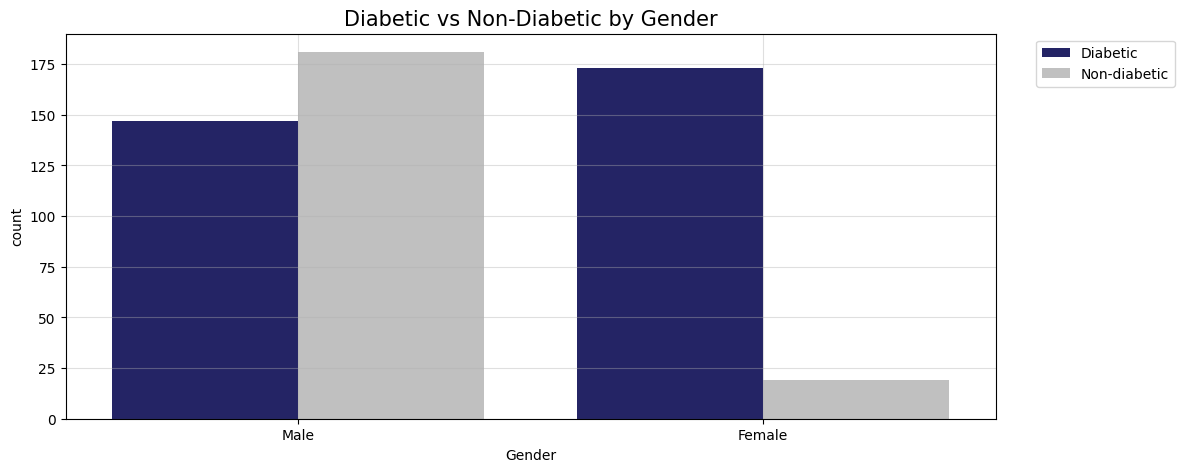

Observed value:


,Diabetic,Non-diabetic
Gender,,
Female,19,173
Male,181,147


Expected frequency:


,Diabetic,Non-diabetic
Gender,,
Female,73.846154,118.153846
Male,126.153846,201.846154


Test statistics:  103.0369
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between Gender and the likelihood of diabetes in the analyzed data.


In [22]:
chi2test('Gender')

#### Question 2 | Does the presence of polyuria exhibit a statistically significant association with the likelihood of diabetes?

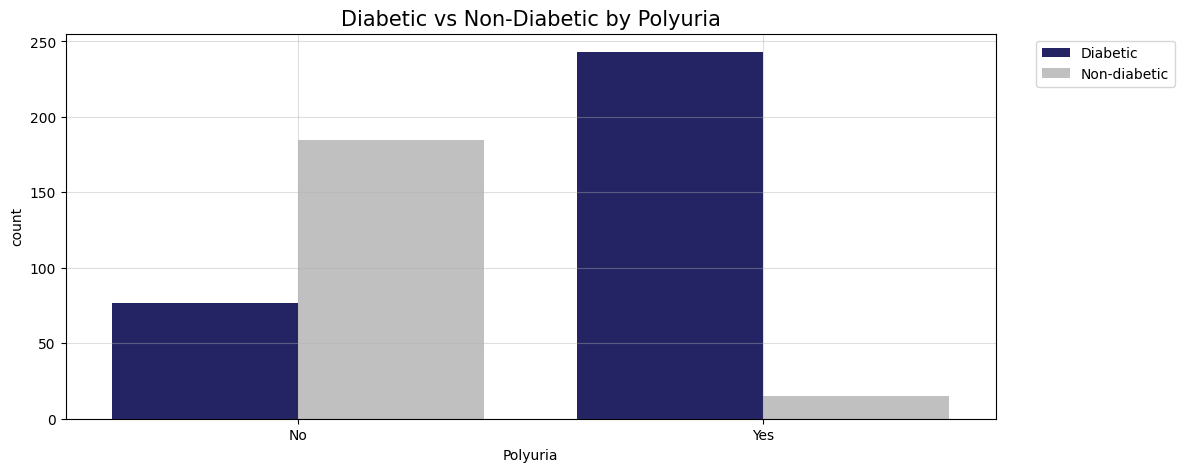

Observed value:


,Diabetic,Non-diabetic
Polyuria,,
No,185,77
Yes,15,243


Expected frequency:


,Diabetic,Non-diabetic
Polyuria,,
No,100.769231,161.230769
Yes,99.230769,158.769231


Test statistics:  227.8658
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between Polyuria and the likelihood of diabetes in the analyzed data.


In [23]:
chi2test('Polyuria')

#### Question 3 | Does the presence of polydipsia exhibit a statistically significant association with the likelihood of diabetes?

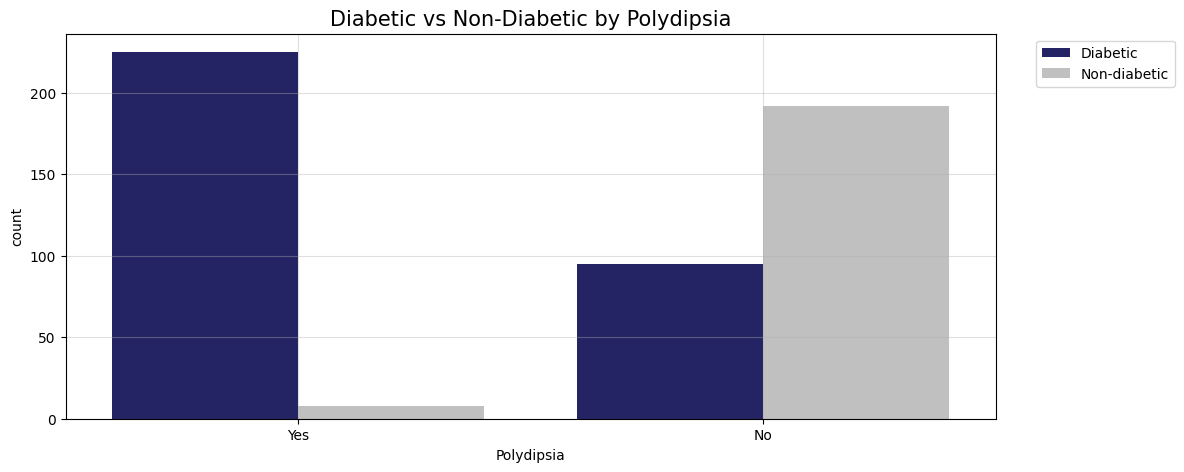

Observed value:


,Diabetic,Non-diabetic
Polydipsia,,
No,192,95
Yes,8,225


Expected frequency:


,Diabetic,Non-diabetic
Polydipsia,,
No,110.384615,176.615385
Yes,89.615385,143.384615


Test statistics:  216.1716
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between Polydipsia and the likelihood of diabetes in the analyzed data.


In [24]:
chi2test('Polydipsia')

#### Question 4 | Is there a statistically significant association between the presence of sudden weight loss and the likelihood of diabetes?

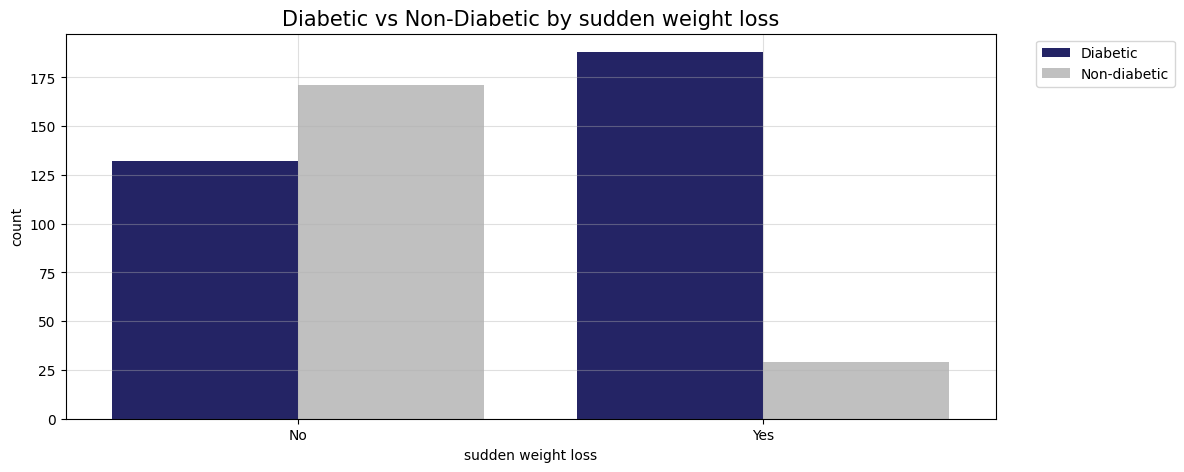

Observed value:


,Diabetic,Non-diabetic
sudden weight loss,,
No,171,132
Yes,29,188


Expected frequency:


,Diabetic,Non-diabetic
sudden weight loss,,
No,116.538462,186.461538
Yes,83.461538,133.538462


Test statistics:  97.2963
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between sudden weight loss and the likelihood of diabetes in the analyzed data.


In [25]:
chi2test('sudden weight loss')

#### Question 5 | Does the presence of weakness exhibit a statistically significant association with the likelihood of diabetes?

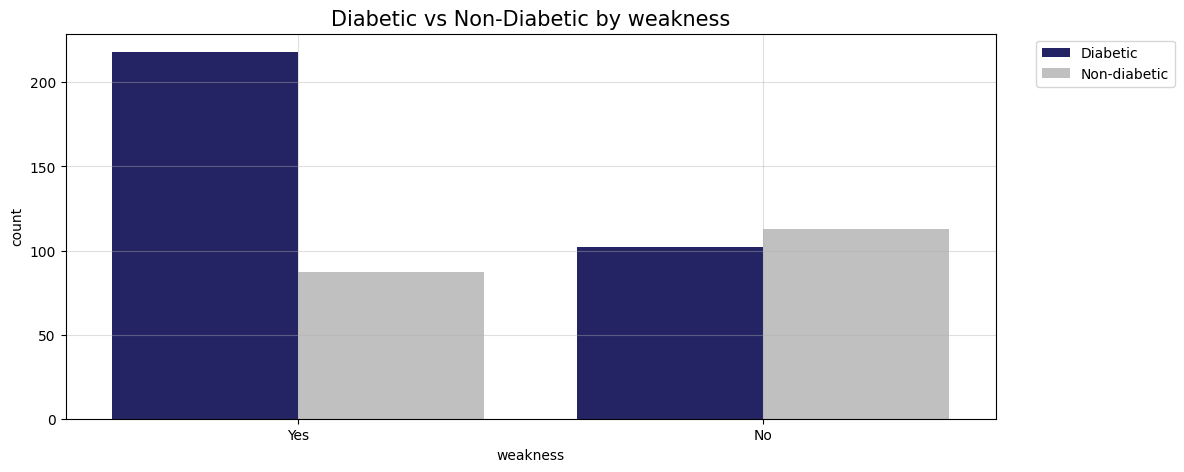

Observed value:


,Diabetic,Non-diabetic
weakness,,
No,113,102
Yes,87,218


Expected frequency:


,Diabetic,Non-diabetic
weakness,,
No,82.692308,132.307692
Yes,117.307692,187.692308


Test statistics:  29.7679
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between weakness and the likelihood of diabetes in the analyzed data.


In [26]:
chi2test('weakness')

#### Question 6 | Is there a statistically significant association between the presence of polyphagia and the likelihood of diabetes?

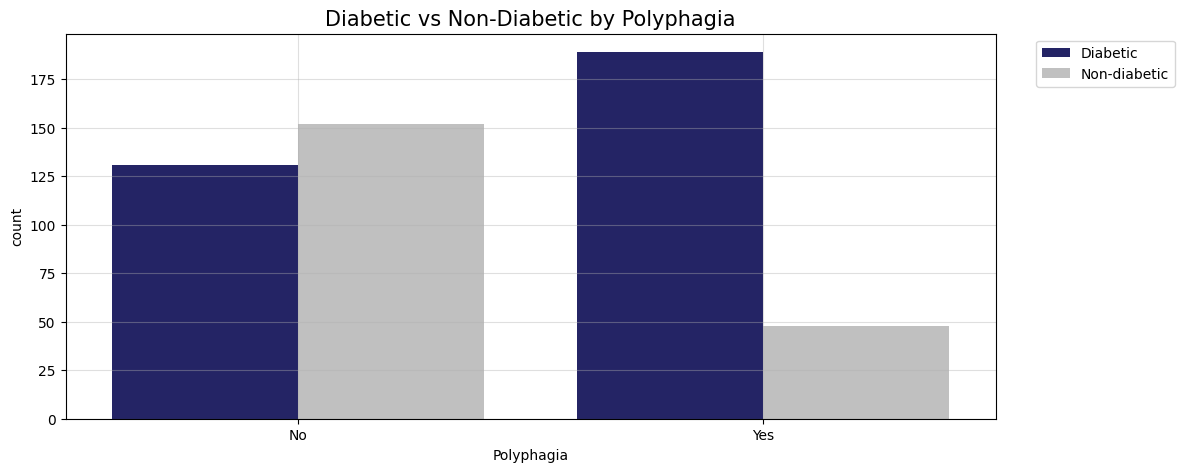

Observed value:


,Diabetic,Non-diabetic
Polyphagia,,
No,152,131
Yes,48,189


Expected frequency:


,Diabetic,Non-diabetic
Polyphagia,,
No,108.846154,174.153846
Yes,91.153846,145.846154


Test statistics:  59.5953
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between Polyphagia and the likelihood of diabetes in the analyzed data.


In [27]:
chi2test('Polyphagia')

#### Question 7 | Is there a statistically significant association between the presence of genital thrush and the likelihood of diabetes?

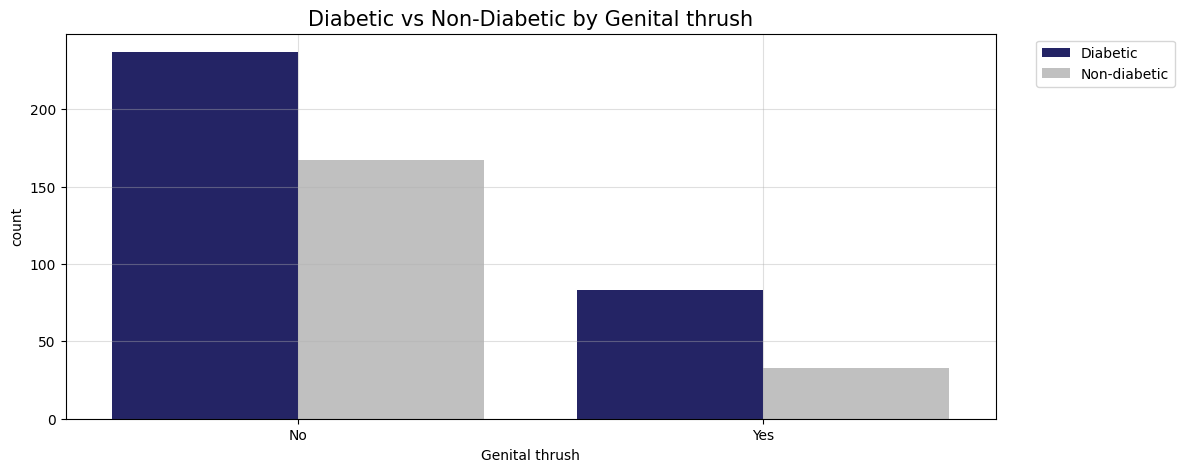

Observed value:


,Diabetic,Non-diabetic
Genital thrush,,
No,167,237
Yes,33,83


Expected frequency:


,Diabetic,Non-diabetic
Genital thrush,,
No,155.384615,248.615385
Yes,44.615385,71.384615


Test statistics:  5.7921
Test p-value:  0.0161
Reject null hypothesis. There is a statistically significant association between Genital thrush and the likelihood of diabetes in the analyzed data.


In [28]:
chi2test('Genital thrush')

#### Question 8 | Is there a statistically significant association between the presence of visual blurring and the likelihood of diabetes?

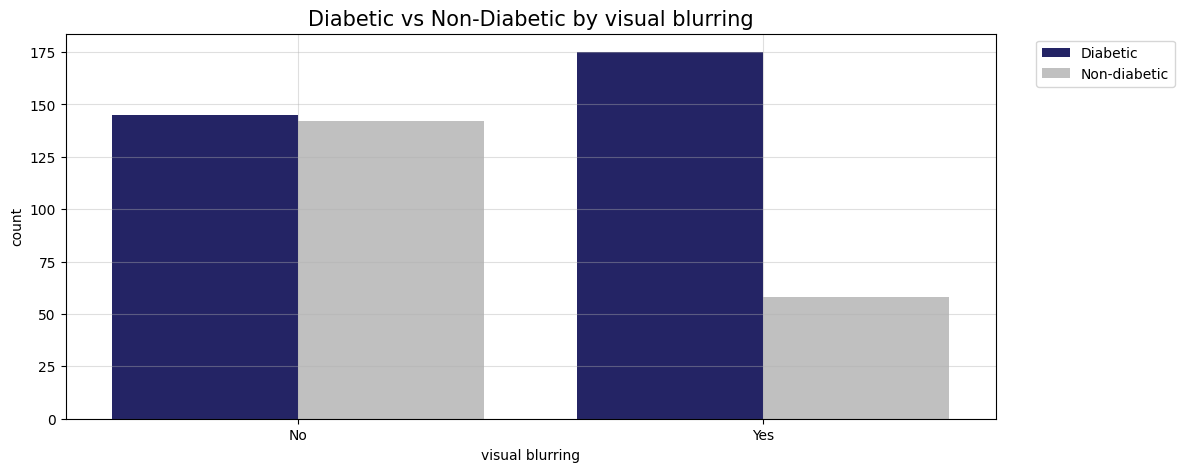

Observed value:


,Diabetic,Non-diabetic
visual blurring,,
No,142,145
Yes,58,175


Expected frequency:


,Diabetic,Non-diabetic
visual blurring,,
No,110.384615,176.615385
Yes,89.615385,143.384615


Test statistics:  31.8085
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between visual blurring and the likelihood of diabetes in the analyzed data.


In [29]:
chi2test('visual blurring')

#### Question 9 | Is there a statistically significant association between the presence of irritability and the likelihood of diabetes?

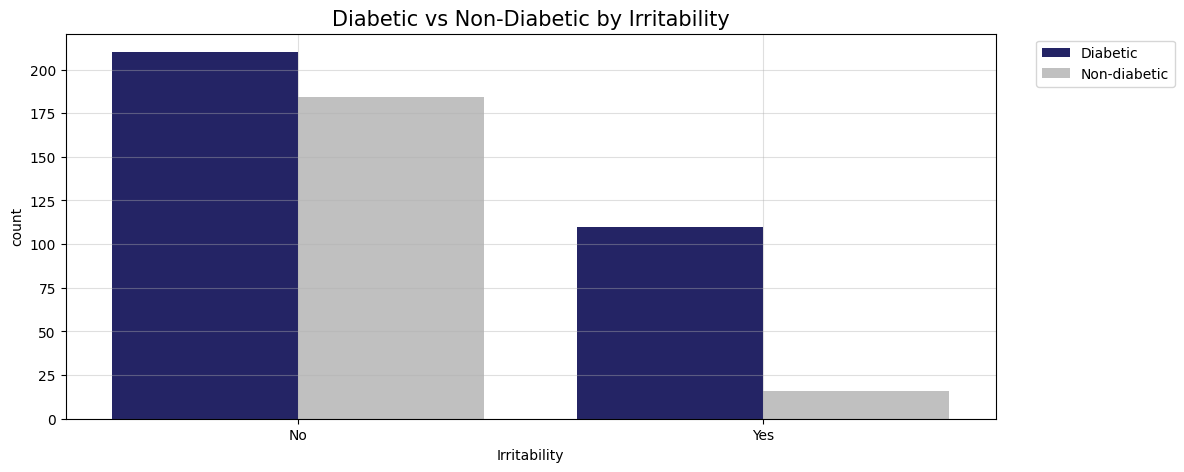

Observed value:


,Diabetic,Non-diabetic
Irritability,,
No,184,210
Yes,16,110


Expected frequency:


,Diabetic,Non-diabetic
Irritability,,
No,151.538462,242.461538
Yes,48.461538,77.538462


Test statistics:  45.2083
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between Irritability and the likelihood of diabetes in the analyzed data.


In [31]:
chi2test('Irritability')

#### Question 10 | Does the presence of delayed healing exhibit a statistically significant association with the likelihood of diabetes?

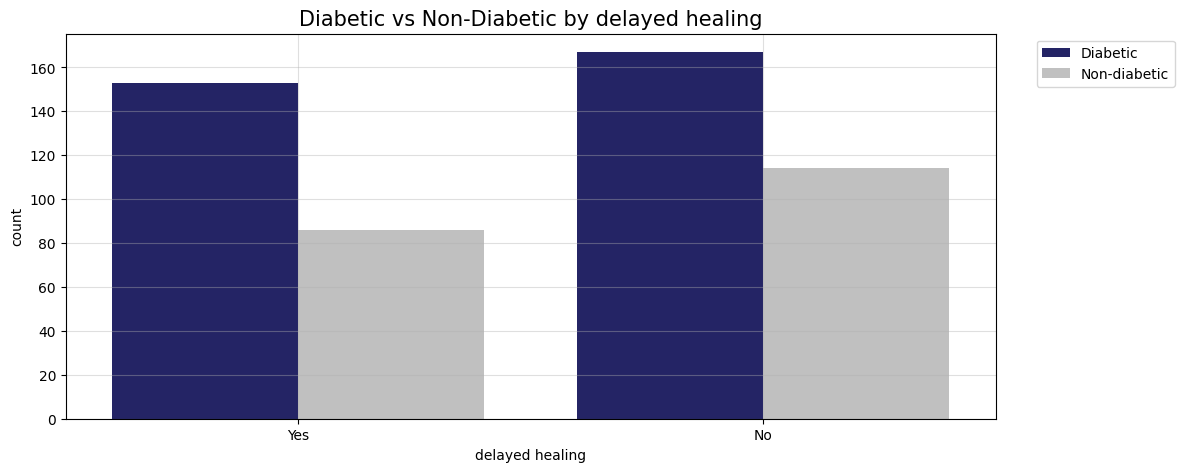

Observed value:


,Diabetic,Non-diabetic
delayed healing,,
No,114,167
Yes,86,153


Expected frequency:


,Diabetic,Non-diabetic
delayed healing,,
No,108.076923,172.923077
Yes,91.923077,147.076923


Test statistics:  0.9621
Test p-value:  0.3267
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between delayed healing and the likelihood of diabetes in the analyzed data.


In [32]:
chi2test('delayed healing')

#### Question 11 | Does the presence of partial paresis exhibit a statistically significant association with the likelihood of diabetes?

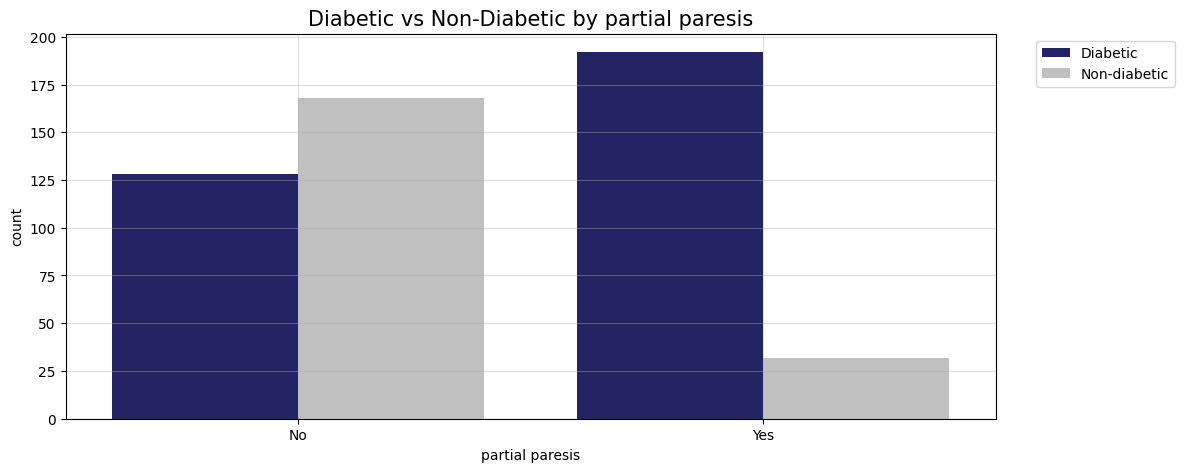

Observed value:


,Diabetic,Non-diabetic
partial paresis,,
No,168,128
Yes,32,192


Expected frequency:


,Diabetic,Non-diabetic
partial paresis,,
No,113.846154,182.153846
Yes,86.153846,137.846154


Test statistics:  95.3876
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between partial paresis and the likelihood of diabetes in the analyzed data.


In [33]:
chi2test('partial paresis')

#### Question 12 | Does the presence of muscle stiffness exhibit a statistically significant association with the likelihood of diabetes?

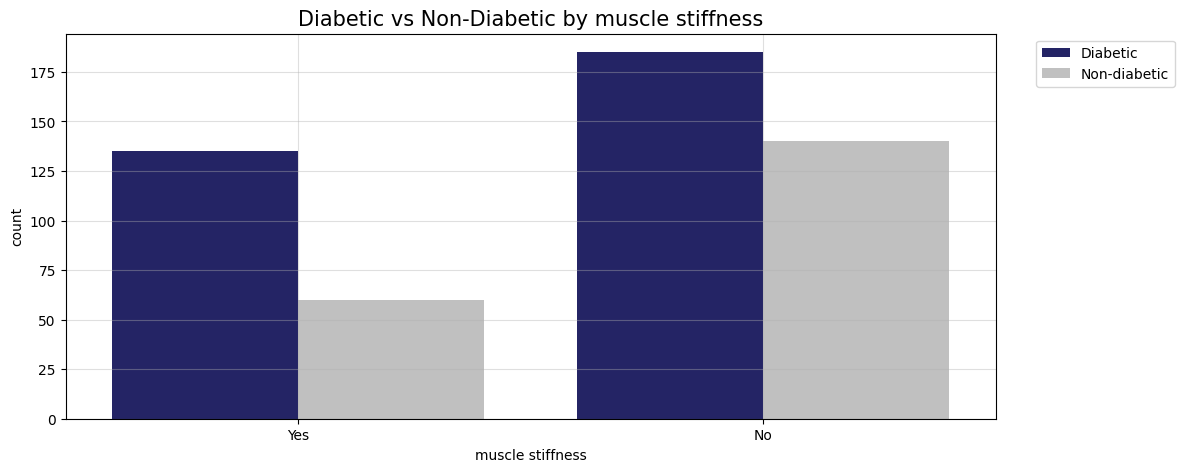

Observed value:


,Diabetic,Non-diabetic
muscle stiffness,,
No,140,185
Yes,60,135


Expected frequency:


,Diabetic,Non-diabetic
muscle stiffness,,
No,125.0,200.0
Yes,75.0,120.0


Test statistics:  7.2887
Test p-value:  0.0069
Reject null hypothesis. There is a statistically significant association between muscle stiffness and the likelihood of diabetes in the analyzed data.


In [34]:
chi2test('muscle stiffness')

#### Question 13 | Does the presence of alopecia exhibit a statistically significant association with the likelihood of diabetes?

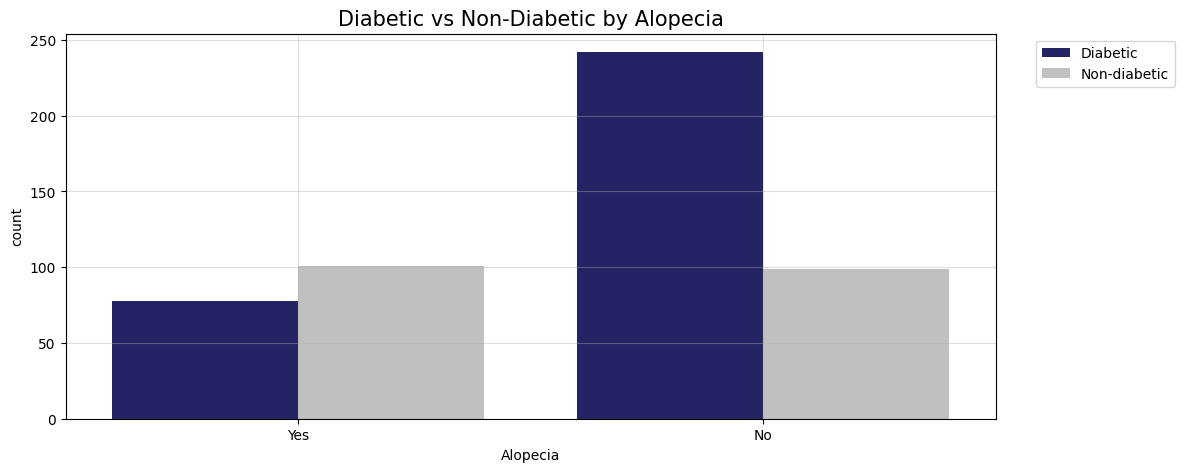

Observed value:


,Diabetic,Non-diabetic
Alopecia,,
No,99,242
Yes,101,78


Expected frequency:


,Diabetic,Non-diabetic
Alopecia,,
No,131.153846,209.846154
Yes,68.846154,110.153846


Test statistics:  36.0641
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between Alopecia and the likelihood of diabetes in the analyzed data.


In [35]:
chi2test('Alopecia')

#### Question 14 | Does obesity exhibit a statistically significant association with the likelihood of diabetes?

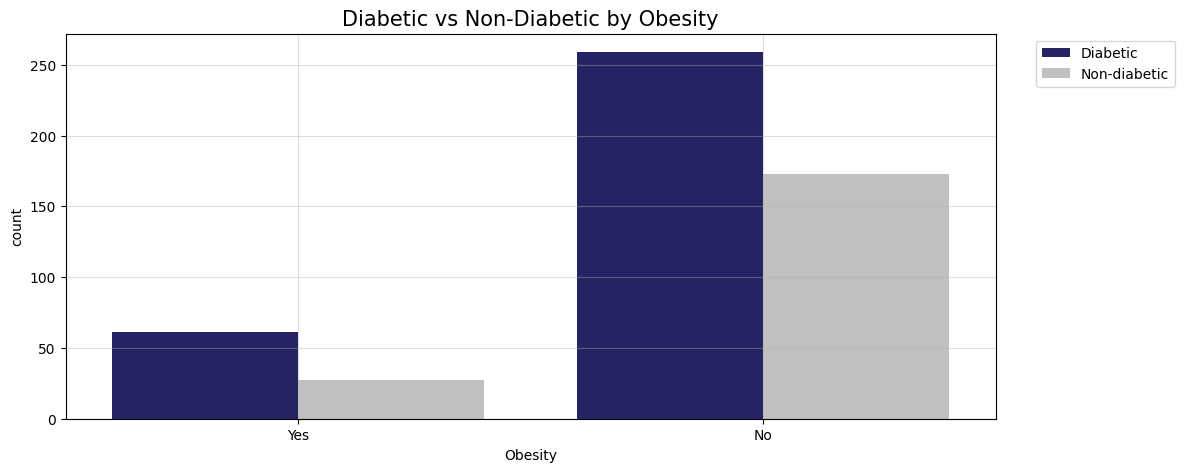

Observed value:


,Diabetic,Non-diabetic
Obesity,,
No,173,259
Yes,27,61


Expected frequency:


,Diabetic,Non-diabetic
Obesity,,
No,166.153846,265.846154
Yes,33.846154,54.153846


Test statistics:  2.3275
Test p-value:  0.1271
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between Obesity and the likelihood of diabetes in the analyzed data.


In [36]:
chi2test('Obesity')

# Predictive Analytics
#### Data Preprocessing for Modelling

In [38]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=122)

# dimension of train and test dataset
print('Dimension of training data: ', train.shape)
print('Dimension of test data: ', test.shape)

Dimension of training data:  (416, 17)
Dimension of test data:  (104, 17)


In [39]:
# segregate the feature matrix and target vector from train and test data
Xtrain = train.drop(columns=['class'], axis=1)
ytrain = train['class']

Xtest = test.drop(columns=['class'], axis=1)
ytest = test['class']

In [40]:
# encode the target/label for train and test dataset
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded = encoder.transform(ytest)

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

#  using OneHotEncoder
excluded_col = 'Age'
categorical_col = [col for col in Xtrain.columns if col != excluded_col]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_col)
    ],
    remainder='passthrough'
)

# create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler())
])

# process the train and test data
Xtrain_transformed = pipeline.fit_transform(Xtrain)
Xtest_transformed = pipeline.transform(Xtest)

# Classification
#### Model 1 | Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(Xtrain_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Accuracy: ', grid_search_tree.best_score_)

# get the best model
best_tree = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy:  0.935140562248996


#### Model 2 | Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best Accuracy: ', grid_search_logreg.best_score_)

# get the best model
best_logreg = grid_search_logreg.best_estimator_

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy:  0.9255020080321286


#### Model 3 | Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest Classifier
forest = RandomForestClassifier(random_state=122)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(Xtrain_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# get the best model
best_forest = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy:  0.9663224325874928


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#### Model 4 | Naive Bayes

In [45]:
from sklearn.naive_bayes import ComplementNB

# create a Naive Bayes classifier
clf = ComplementNB()

# fit the classifier with training data
cNB = clf.fit(Xtrain_transformed,ytrain_encoded)

#### Model 5 | KNearestNeighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# create the KNN classifier
knn = KNeighborsClassifier()

# define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': np.arange(1, 21),
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# create a GridSearchCV object with KNN and the parameter grid
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model with the training data
grid_search_knn.fit(Xtrain_transformed,ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_knn.best_params_)
print('Best Accuracy: ', grid_search_knn.best_score_)

# get the best model
best_knn = grid_search_knn.best_estimator_

Best Parameters:  {'n_neighbors': 1, 'p': 1}
Best Accuracy:  0.971170395869191


#### Model 6 | Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC

# create the SVM classifier
svc = SVC(random_state=122)

# define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],                 # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],    # Choice of kernel
    'gamma': ['scale', 'auto', 0.1, 1],     # Kernel coefficient for 'rbf' and 'poly'
    'degree': [2, 3, 4]                     # Degree of the polynomial kernel
}

# create a GridSearchCV object with SVM and the parameter grid
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# fit the model with the training data
grid_search_svc.fit(Xtrain_transformed,ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_svc.best_params_)
print('Best Accuracy: ', grid_search_svc.best_score_)

# get the best model
best_svc = grid_search_svc.best_estimator_

Best Parameters:  {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy:  0.9687607573149742


# Performance Evaluation & Model Comparison

In [48]:
# define a helper function to perform model evaluation based on key metrics
from sklearn.metrics import precision_recall_fscore_support, matthews_corrcoef

def performance_evaluation(X,y,clf,classifier_name=''):
    ypred = clf.predict(X)
    accuracy = clf.score(X,y)
    mcc = matthews_corrcoef(y, ypred)
    precision, recall, fscore, support = precision_recall_fscore_support(y, ypred, average='weighted', zero_division=0)
    metricName = ['Accuracy','Precision','Recall','F1_Score','MCC']
    metricValue = [accuracy,precision,recall,fscore,mcc]
    res = pd.DataFrame(metricValue, index=metricName, columns=[classifier_name])
    return res

In [49]:
# generate the performance summary for various models trained
tree_summary = performance_evaluation(Xtest_transformed,ytest_encoded,best_tree,'Decision Tree')
logistic_summary = performance_evaluation(Xtest_transformed,ytest_encoded,best_logreg,'Logistic Regression')
forest_summary = performance_evaluation(Xtest_transformed,ytest_encoded,best_forest,'Random Forest')
naivebayes_summary = performance_evaluation(Xtest_transformed,ytest_encoded,cNB,'Naive Bayes')
knn_summary = performance_evaluation(Xtest_transformed,ytest_encoded,best_knn,'K Nearest Neigbors')
svc_summary = performance_evaluation(Xtest_transformed,ytest_encoded,best_svc,'Support Vector Machine')

# combine the summary of each model into a dataframe
comparison_df = pd.concat([tree_summary,forest_summary,logistic_summary,naivebayes_summary,knn_summary,svc_summary], axis=1)

# disply the summary dafaframe
display(comparison_df)

,Decision Tree,Random Forest,Logistic Regression,Naive Bayes,K Nearest Neigbors,Support Vector Machine
Accuracy,0.942308,0.942308,0.875000,0.913462,0.961538,0.942308
Precision,0.944138,0.947324,0.878676,0.915740,0.961933,0.947324
Recall,0.942308,0.942308,0.875000,0.913462,0.961538,0.942308
F1_Score,0.941716,0.941342,0.872456,0.912303,0.961358,0.941342
MCC,0.880075,0.882852,0.738075,0.819218,0.919540,0.882852


##### Notes:

The Matthews Correlation Coefficient (MCC) is a metric commonly used to assess the performance of binary classification models. It takes into account true positives, true negatives, false positives, and false negatives and provides a balanced measure, especially when the classes are imbalanced.


Here's why MCC is a useful metric:

1. **Balancing Act:** MCC takes into account all four elements of the confusion matrix, making it suitable for imbalanced datasets. This is crucial when the number of instances in one class is much higher than the other, as accuracy alone can be misleading.

2. **Range of Values:** MCC ranges from -1 to 1. A score of 1 indicates a perfect prediction, 0 means no better than random, and -1 indicates total disagreement between prediction and observation. This range provides a clear understanding of the quality of the model.

3. **Symmetry:** MCC is symmetric; it considers errors in both positive and negative classes. This is especially important when the costs of false positives and false negatives are different.

4. **Effectiveness in Binary Classification:** MCC is particularly effective for binary classification problems and is less sensitive to class imbalance compared to some other metrics like accuracy.

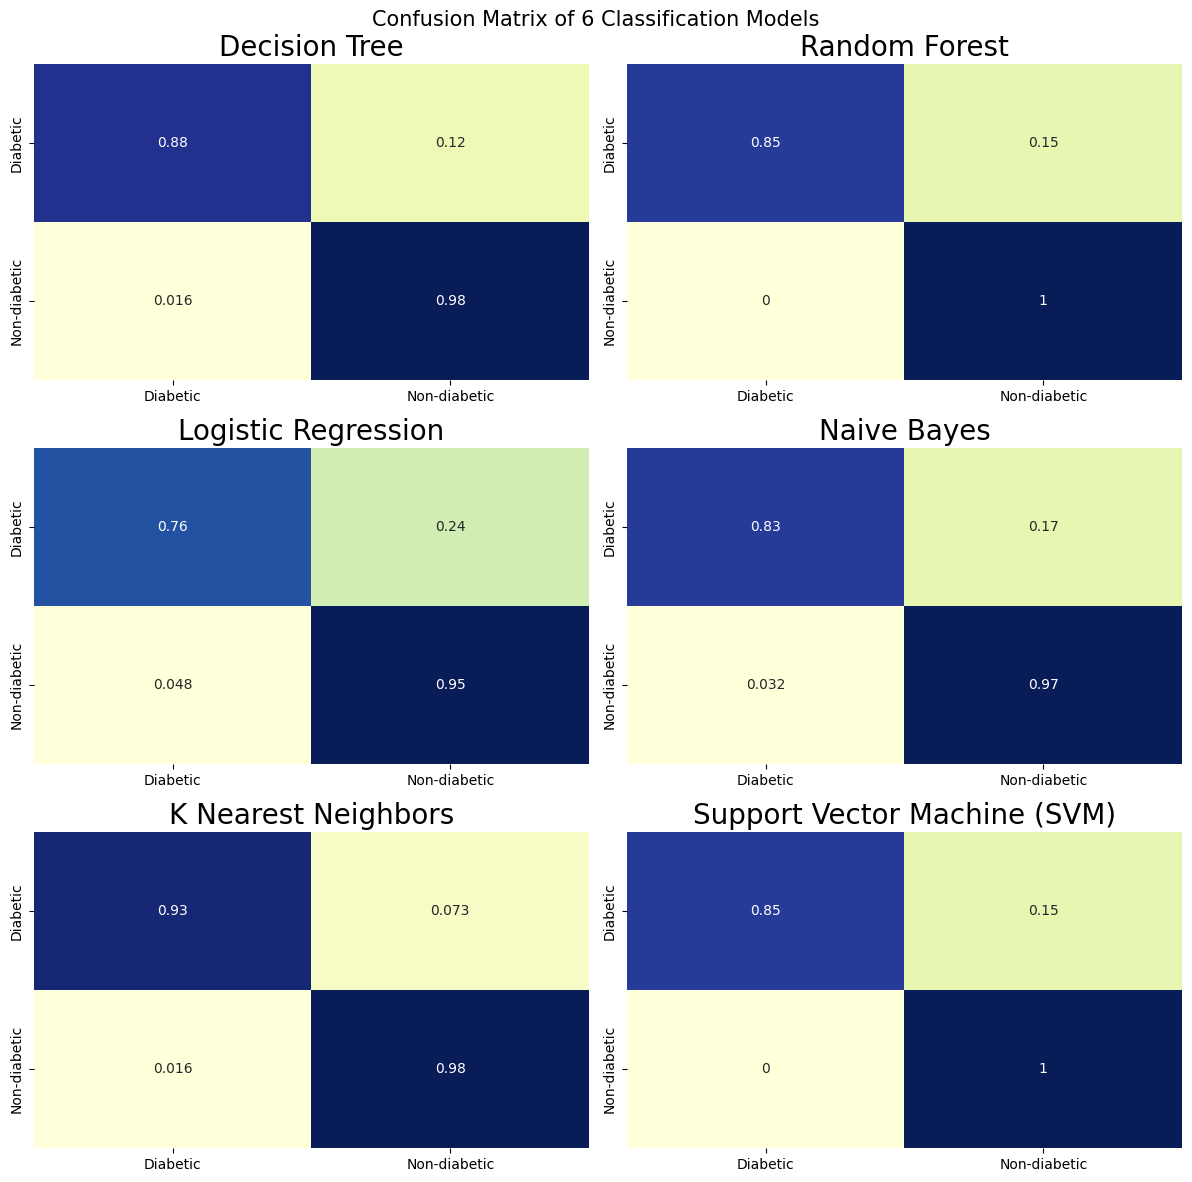

In [51]:
# visualize the confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Diabetic', 'Non-diabetic']

ypred_tree = best_tree.predict(Xtest_transformed)
cm_tree = confusion_matrix(ytest_encoded, ypred_tree, normalize='true')

ypred_forest = best_forest.predict(Xtest_transformed)
cm_forest = confusion_matrix(ytest_encoded, ypred_forest, normalize='true')

ypred_logistic = best_logreg.predict(Xtest_transformed)
cm_logistic = confusion_matrix(ytest_encoded, ypred_logistic, normalize='true')

ypred_nb = cNB.predict(Xtest_transformed)
cm_nb = confusion_matrix(ytest_encoded, ypred_nb, normalize='true')

ypred_knn = best_knn.predict(Xtest_transformed)
cm_knn = confusion_matrix(ytest_encoded, ypred_knn, normalize='true')

ypred_svc = best_svc.predict(Xtest_transformed)
cm_svc = confusion_matrix(ytest_encoded, ypred_svc, normalize='true')

# confusion matrix for 6 classification models
figure, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plot for Decision Tree
sns.heatmap(cm_tree, annot=True, cmap='YlGnBu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Decision Tree', fontsize=20)

# Plot for Random Forest
sns.heatmap(cm_forest, annot=True, cmap='YlGnBu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('Random Forest', fontsize=20)

# Plot for Logistic Regression
sns.heatmap(cm_logistic, annot=True, cmap='YlGnBu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1, 0])
axes[1, 0].set_title('Logistic Regression', fontsize=20)

# Plot for Naive Bayes
sns.heatmap(cm_nb, annot=True, cmap='YlGnBu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1, 1])
axes[1, 1].set_title('Naive Bayes', fontsize=20)

# Plot for K Nearest Neighbors
sns.heatmap(cm_knn, annot=True, cmap='YlGnBu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[2, 0])
axes[2, 0].set_title('K Nearest Neighbors', fontsize=20)

# Plot for Support Vector Machine (SVM)
sns.heatmap(cm_svc, annot=True, cmap='YlGnBu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[2, 1])
axes[2, 1].set_title('Support Vector Machine (SVM)', fontsize=20)

# Adjust the layout and title
figure.suptitle('Confusion Matrix of 6 Classification Models', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# Conclusion

In my analysis, I identified several key factors significantly associated with the likelihood of diabetes, including Gender, Polyuria, Polydipsia, sudden weight loss, weakness, Polyphagia, Genital thrush, visual blurring, Irritability, partial paresis, muscle stiffness, and Alopecia. Conversely, Itching and delayed healing did not show significant associations. Age also emerged as an important predictive factor, with a notable difference between diabetic and non-diabetic individuals.

I then utilized multiple classification models to predict diabetes risk. The K Nearest Neighbors model emerged as the most accurate and precise, achieving an accuracy of 96.15% and precision of 96.19%. Decision Tree and Random Forest models also showed strong performance, with accuracies and precisions around 94%. Support Vector Machine demonstrated robust metrics across the board. While Logistic Regression and Naive Bayes achieved reasonable accuracy, their precision and MCC scores were comparatively lower.

Overall, the K Nearest Neighbors, Decision Tree, and Random Forest models are well-suited for predicting diabetes risk based on my dataset, with K Nearest Neighbors being the most effective.